**Aim: Implement Decsion Tree classifier**


- Implement Decision Tree classifier using scikit learn library
- Test the classifier for Weather dataset

Step 1: Import necessary libraries.

In [1]:
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from subprocess import call

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Step 2: Prepare dataset.

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

Step 3: Digitize the data set using encoding

In [4]:
# creating labelEncoder
le = preprocessing.LabelEncoder()

print("-------------Mappings-----------\n")
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping: ",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping: ",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping: ",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping: ",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping: ",Play_name_mapping)

print("\n-------------Data After Encoding----------------\n")
print("Weather: " ,Outlook_encoded)
print("Temerature: " ,Temperature_encoded)
print("Humidity: " ,Humidity_encoded)
print("Wind: " ,Wind_encoded)
print("Play: " ,Play_encoded)

-------------Mappings-----------

Outllok mapping:  {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping:  {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping:  {'High': 0, 'Normal': 1}
Wind mapping:  {'False': 0, 'True': 1}
Play mapping:  {'No': 0, 'Yes': 1}

-------------Data After Encoding----------------

Weather:  [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:  [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Step 4: Merge different features to prepare dataset

In [5]:
features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
print(features)

((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


Step 5: Train ’Create and Train DecisionTreeClassifier’

In [6]:
#Create a Decision Tree Classifier (using Entropy)
dtc = DecisionTreeClassifier(criterion = "entropy")

# Train the model using the training sets
dtc.fit(features, Play_encoded)   #(features, Class_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Step 6: Predict Output for new data

In [7]:
#Predict Output
pred = dtc.predict([[0, 1, 1, 0],[2, 2, 1, 1], [2, 2, 0, 1]])
print("Prediction on whether play or not:: ", pred)

Prediction on whether play or not::  [1 1 0]


Step 7: Display Decsion Tree Created
 
 - This step requires graphviz and tkinter packages installed

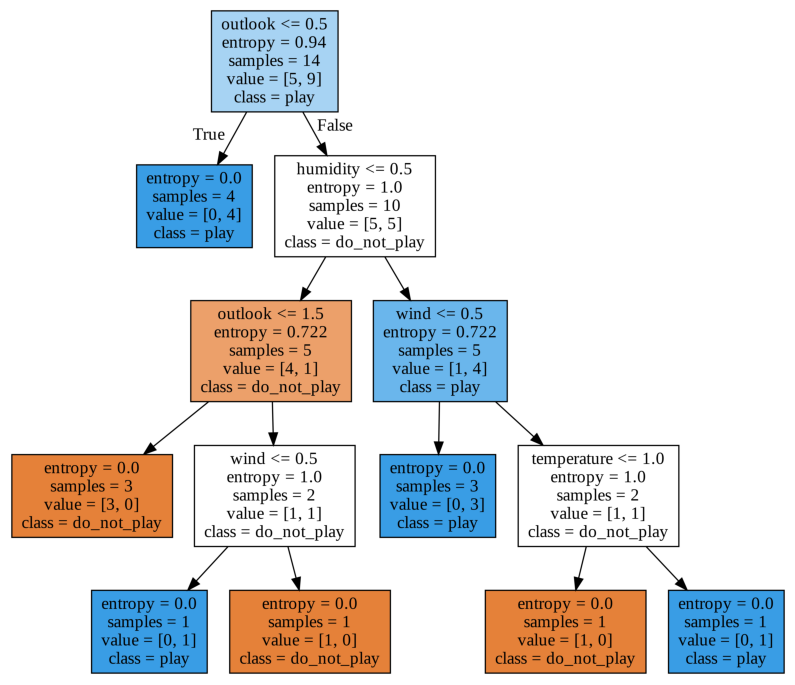

In [8]:
export_graphviz(dtc,out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = play'), Text(74.4, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = play'), Text(148.8, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = do_not_play'), Text(74.4, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = do_not_play'), Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = do_not_play'), Text(111.60000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = do_not_play'), Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = play'), Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = do_not_play'), Text(223.20000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = play'), Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = play'), Text(260.40000000000003, 65.232, 'X[1] <= 1.

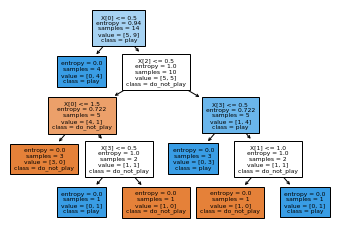

In [9]:
print(plot_tree(dtc,  class_names = ['do_not_play','play'], fontsize = 6, filled=True, impurity=True))